In [1]:
#import the MNIST data set from KERAS:

from keras.datasets import mnist
(train_x, train_y), (test_x, test_y) = mnist.load_data() 

Using TensorFlow backend.


In [2]:
# exploring the data:

print("Inputs shape is " + str(train_x.shape))
print("Input type is " + str(type(train_x)))
print("Labels:")
print(train_y)
print("Labels shape is" + str(train_y.shape))
print("Labels type is " + str(type(train_y)))

Inputs shape is (60000, 28, 28)
Input type is <class 'numpy.ndarray'>
Labels:
[5 0 4 ..., 5 6 8]
Labels shape is(60000,)
Labels type is <class 'numpy.ndarray'>


In [3]:
# input shape: 60000 examples
# Each image: 28 x 28

train_x.shape

(60000, 28, 28)

5


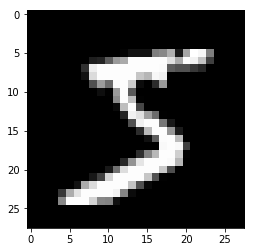

In [7]:
# visualize the input sample:
import matplotlib.pyplot as plt


sample_num = 0

plt.imshow(train_x[sample_num], cmap=plt.get_cmap('gray'))
print(train_y[sample_num])
plt.show()

In [10]:
# flatten the 28 x 28 images to a 784 dim vector

num_pixels = train_x.shape[1] * train_x.shape[2]
train_x_flattened = train_x.reshape(train_x.shape[0], num_pixels).astype('float32')
test_x_flattened = test_x.reshape(test_x.shape[0], num_pixels).astype('float32')

In [12]:
# normalize the pixel values to between 0 - 1
train_x_flattened = train_x_flattened / 255.
test_x_flattened = test_x_flattened / 255.


In [13]:
import keras

# Use Keras to categorize the outputs as "one-hot" vectors
train_y_categorical = keras.utils.to_categorical(train_y, num_classes=10)
test_y_categorical = keras.utils.to_categorical(test_y, num_classes=10)

# let's see result of categorizing the outputs
print(test_y_categorical[:5])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


In [15]:
# create the neural network model:

from keras.layers import Dense, Activation
from keras.models import Sequential

# initalize the neural network:

model = Sequential()

# first hidden layer has 500 neurons

model.add(Dense(units = 500, input_dim=784))
model.add(Activation('relu')) # Using the Relu activation function

# second hidden layer has 250 neurons
model.add(Dense(200))
model.add(Activation('relu'))

#final output layer should have 10 neurons, one for each class:
model.add(Dense(10))
model.add(Activation('softmax')) # probability distribution, between 0 and 1





In [17]:
# compile the model:
model.compile(loss='categorical_crossentropy', 
              optimizer='sgd', #stochastic gradient descent
             metrics=['accuracy'])

In [18]:
# Import relevant libraries
from keras_tqdm import TQDMNotebookCallback # TQDM: progress bars
from keras.callbacks import TensorBoard # Tensorboard: training plots
    
# Clear any existing Tensorboard logs
import shutil
shutil.rmtree('./logs', ignore_errors=True)

# Set up callback links to refer back to during training
tensorboard = TensorBoard()
callbacks_list = [TQDMNotebookCallback(), tensorboard]



In [19]:
# Fit the model to the training data
# 10 epochs, 32 batch size

# Validation split: reserve some of our training data to use as "validation" data
    # Won't train on validation data -- check validation loss to look for overfitting
    
# Pass in our callbacks to track training progress

model.fit(train_x_flattened, train_y_categorical, epochs=20, \
          batch_size=32, verbose=0, validation_split = .1, callbacks=callbacks_list)

HBox(children=(IntProgress(value=0, description='Training', max=20), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 0', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 1', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 2', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 3', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 4', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 5', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 6', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 7', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 8', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 9', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 10', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 11', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 12', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 13', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 14', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 15', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 16', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 17', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 18', max=54000), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Epoch 19', max=54000), HTML(value='')))

In [20]:
# Evaluate trained model on test data
loss_and_metrics = model.evaluate(test_x_flattened, test_y_categorical, batch_size=128)
print(loss_and_metrics)

 9984/10000 [============================>.] - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA: 0s[0.075398074084147809, 0.9758]


[[  6.97747691e-06   9.96939182e-01   3.21609696e-04   9.43830673e-05
    1.85810262e-04   4.98915870e-05   1.81172218e-04   1.23127690e-03
    9.27566260e-04   6.22179286e-05]]
1


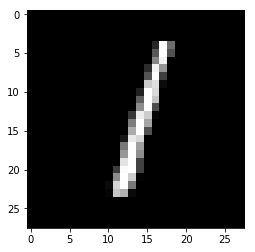

In [22]:

# Make sure our predictions make sense
import numpy as np

sample_num = 2 # which test sample to look at

# Predicted class
test_sample = np.expand_dims(test_x_flattened[sample_num], axis=0) # create a one-sample "batch" to feed into model
predicted_scores = model.predict(test_sample) # outputted probabilities vector
print(predicted_scores)

predicted_class = np.argmax(predicted_scores) # pick the class with highest probability --> final prediction
print(predicted_class)

# Actual input
plt.imshow(test_x[sample_num], cmap=plt.get_cmap('gray'))
plt.show()